Problem 1: Load the house prices dataset (data/house_prices_train.csv).

Count what fraction of the houses belong to the various MasVnrType categories and prepare a bar plot. (2 points)

Prepare a violin plot and show how the OverallQual influences the SalePrice. (2 points)

Prepare a boxplot that shows the SalePrice as a function of YearBuilt. (2 points)

Please include the figures in the notebook.


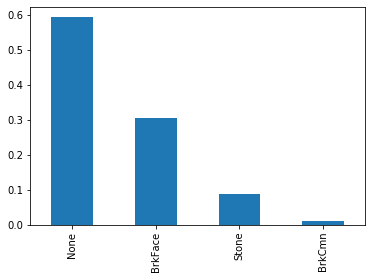

In [5]:
import matplotlib
from matplotlib import pylab as plt
import pandas as pd
import numpy as np

df = pd.read_csv('data/house_prices_train.csv')

(df['MasVnrType'].value_counts()/df.shape[0]).plot.bar()
plt.show()

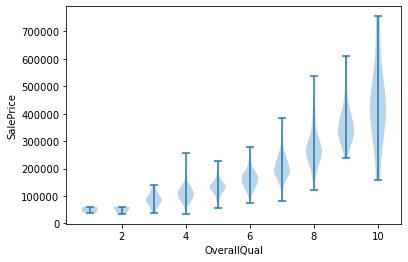

In [6]:
quals = np.unique(df['OverallQual'])
dataset = []

for q in quals:
    dataset.append(df[df['OverallQual']==q]['SalePrice'].values)

plt.violinplot(dataset = dataset)
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

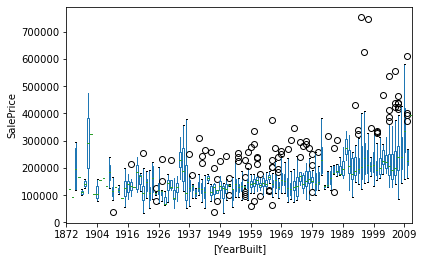

In [7]:
df[['YearBuilt','SalePrice']].boxplot(by='YearBuilt',grid=False)
plt.xticks(np.arange(len(df['YearBuilt'].unique()))[::10],sorted(df['YearBuilt'].unique())[::10])
plt.ylabel('SalePrice')
plt.suptitle('')
plt.title('')
plt.show()

Problem 2: Load and preprocess the adult dataset. (0 points - copy-paste)

Use the mutual information to select the top 10 most important features and print their names. (3 points)

Use the f test to select the top 10 most important features and print their names. (3 points)

Did you end up with the same set of features? Print out how many features appear at least once in both selection methods! (1 point)

In [1]:
# copy-paste from lecture
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.compose import ColumnTransformer
import matplotlib
from matplotlib import pylab as plt
from sklearn.pipeline import Pipeline

df = pd.read_csv('data/adult_data.csv')

cat_ftrs = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country']
cont_ftrs = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
label = 'gross-income'

# one-hot encoder
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse=False))])

# standard scaler
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

class ModifiedLabelEncoder(LabelEncoder):
    def fit_transform(self, y, *args, **kwargs):
        return super().fit_transform(y).reshape(-1, 1)
    def transform(self, y, *args, **kwargs):
        return super().transform(y).reshape(-1, 1)

# label encoder
label_transformer = Pipeline(steps=[
    ('label_enc', ModifiedLabelEncoder())])
# collect the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, cont_ftrs),
        ('cat', categorical_transformer, cat_ftrs),
        ('label',label_transformer, label)])

# fit_transform the data
X_prep = preprocessor.fit_transform(df)

# little hacky, but collect feature names
feature_names = preprocessor.transformers_[0][-1] + \
                list(preprocessor.named_transformers_['cat'][0].get_feature_names()) + \
                [label]

df_preprocessed = pd.DataFrame(data=X_prep,columns=feature_names)
y = df_preprocessed[label]
df_preprocessed.drop(columns=[label],inplace=True)

In [2]:
# f test
fs1 = SelectKBest(f_classif,k=10)
fs1.fit_transform(df_preprocessed,y)
fs1_feature_names = list(df_preprocessed.columns[fs1.get_support()])

# mutual information
fs2 = SelectKBest(mutual_info_classif,k=10)
fs2.fit_transform(df_preprocessed,y)
fs2_feature_names = list(df_preprocessed.columns[fs2.get_support()])

print(fs1_feature_names)
print(fs2_feature_names)

all_selected_features = list(set(fs1_feature_names+fs2_feature_names))
print(len(all_selected_features), all_selected_features)

['age', 'education-num', 'capital-gain', 'hours-per-week', 'x2_ Married-civ-spouse', 'x2_ Never-married', 'x4_ Husband', 'x4_ Own-child', 'x6_ Female', 'x6_ Male']
['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'x2_ Married-civ-spouse', 'x2_ Never-married', 'x4_ Husband', 'x4_ Own-child']
12 ['x4_ Husband', 'x4_ Own-child', 'capital-gain', 'x2_ Married-civ-spouse', 'age', 'hours-per-week', 'x2_ Never-married', 'fnlwgt', 'x6_ Male', 'capital-loss', 'x6_ Female', 'education-num']


Problem 3: Prepare visualizations showing the relationship between features selected in problem 2 and the target variable (one plot per feature). (5 points)

Prepare a scatter matrix using the continuous features selected in problem 2 and the target variable. (2 points)

Please include the figures in the notebook.

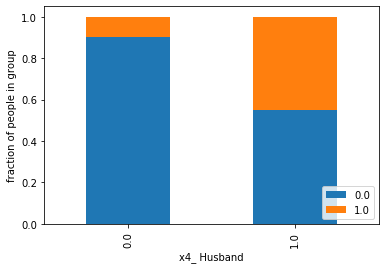

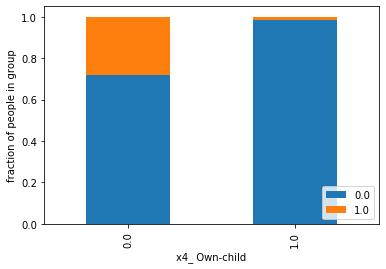

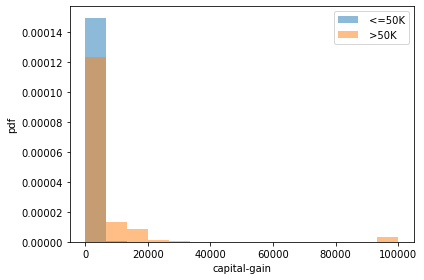

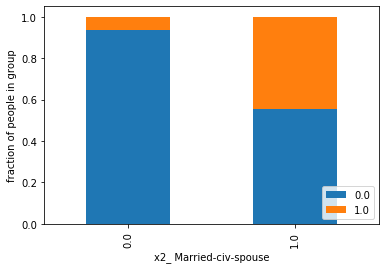

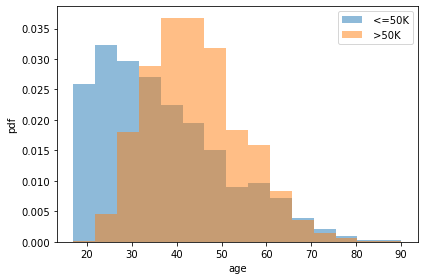

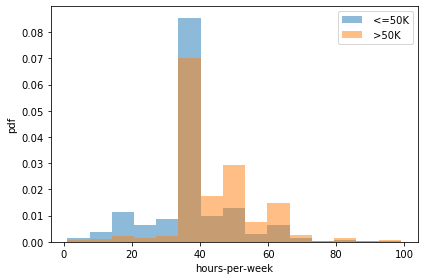

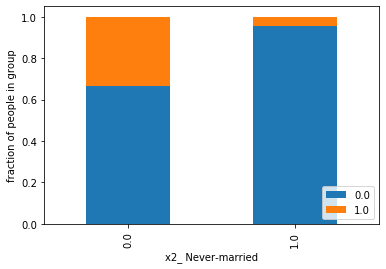

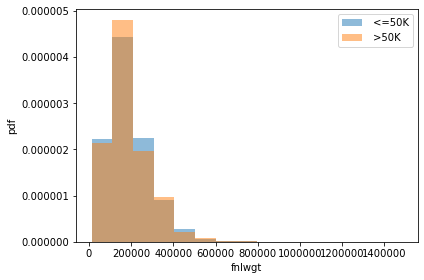

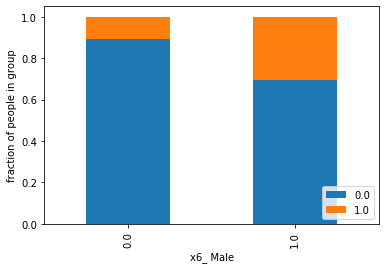

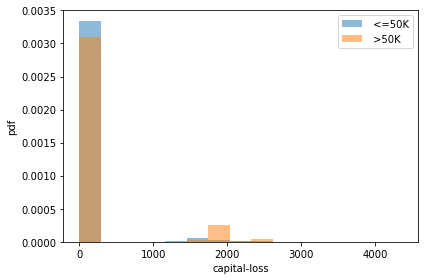

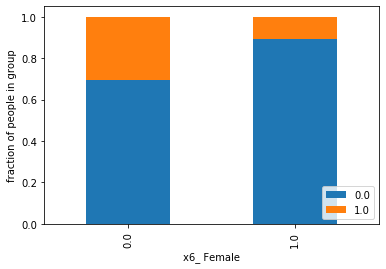

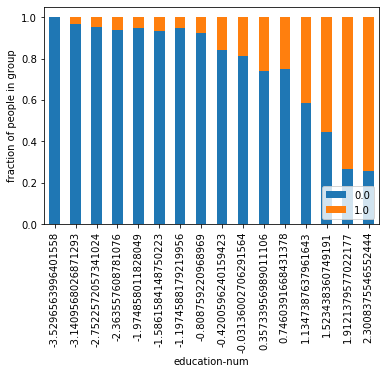

In [3]:
import numpy as np
# add the label back for groupby
df_preprocessed[label] = y

cont_features = []

for ftr in all_selected_features:
    if len(df_preprocessed[ftr].unique()) < 17:
        # prepare stacked bar plot
        count_matrix = df_preprocessed.groupby([ftr, label]).size().unstack()
        count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
        count_matrix_norm.plot(kind='bar', stacked=True)
        plt.ylabel('fraction of people in group')
        plt.legend(loc=4)
        plt.show()
                
    else:
        cont_features.append(ftr)
        # prepare overlapping histograms
        categories = df[label].unique()
        bin_range = (df[ftr].min(),df[ftr].max())

        for c in categories:
            plt.hist(df[df[label]==c][ftr],alpha=0.5,label=c,range=bin_range,bins=15,density=True)
        plt.legend()
        plt.ylabel('pdf')
        plt.xlabel(ftr)
        plt.tight_layout()
        plt.show()

        

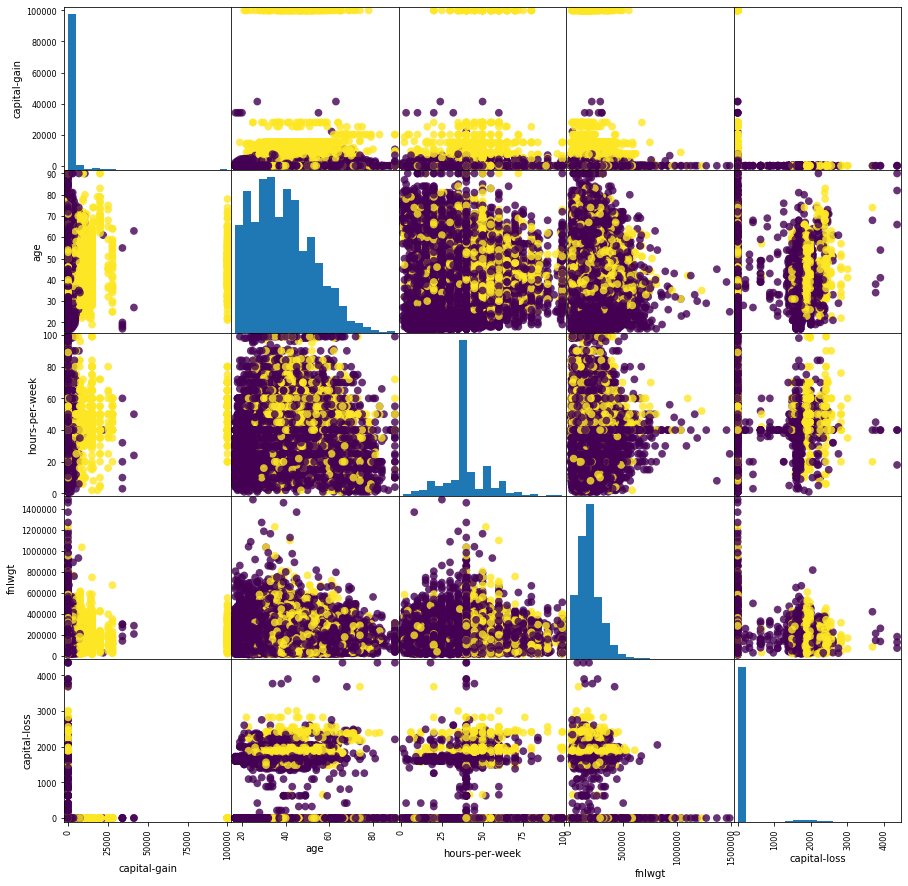

In [4]:
pd.plotting.scatter_matrix(df[cont_features],c = df_preprocessed[label], figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20}, s=60, alpha=.8)
plt.show()